In [3]:
import sys,os
import pickle
import anndata
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
data_type = 'float32'
os.environ["THEANO_FLAGS"] = 'device=cuda,floatX=' + data_type + ',force_device=True' + ',dnn.enabled=False'
import countcorrect as cc

In [5]:
adata_wta = sc.read_h5ad(open("/home/jupyter/Kidney_AnnData.h5ad", "rb"))

/opt/conda/envs/countcorrect/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
counts_geneProbes = np.asarray(adata_wta.X)
counts_negativeProbes = np.asarray(adata_wta.obsm['negProbes'])
counts_nuclei = np.asarray(adata_wta.obs['AOINucleiCount']).reshape(len(adata_wta.obs['AOINucleiCount']),1).squeeze()

Initializing model...
Fitting model ...


Finished [100%]: Average Loss = nan


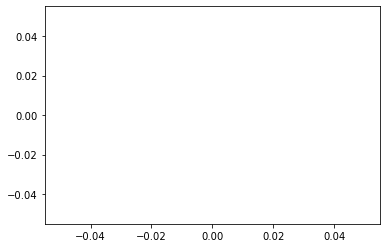

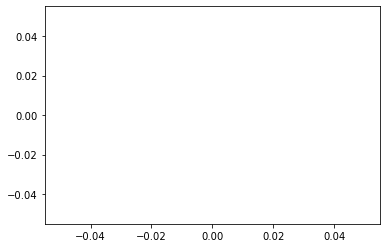

Sampling from posterior distribution...
Done.


In [7]:
X_corrected = cc.run_countcorrect(counts_geneProbes, counts_negativeProbes, counts_nuclei)

In [8]:
adata_wta.layers['X_corrected'] = X_corrected

In [9]:
adata_wta.write_h5ad('/home/jupyter/Kidney_AnnData_1.h5ad')